# Titanic — Análise Exploratória de Dados (EDA)
*Objetivo:* explorar o dataset do Titanic e identificar fatores associados à sobrevivência.


## Sumário
1. Importação e visão geral dos dados  
2. Limpeza e preparação  
3. Análise exploratória (EDA)  
4. Insights principais  
5. Próximos passos



## 1. Importação e visão geral dos dados
Nesta seção carregamos o dataset e entendemos sua estrutura (colunas, tipos e valores ausentes).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
%matplotlib inline

print("Pronto! Bibliotecas carregadas.")


Pronto! Bibliotecas carregadas.


## 2. Limpeza e preparação
- Verificação de valores ausentes  
- Criação de variáveis úteis (ex.: `family_size`)  
- Padronizações simples


In [2]:
# Carregar o dataset Titanic direto do seaborn
titanic = sns.load_dataset("titanic")

# Ver as 5 primeiras linhas
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 3. Análise Exploratória (EDA)
Nesta seção analisamos distribuições e relações com `survived` (idade, sexo, classe, porto, família).


In [3]:
# Informações gerais sobre o dataset
titanic.info()

# Estatísticas básicas das colunas numéricas
titanic.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 4. Insights principais
- A maioria dos passageiros tinha entre 25 e 30 anos.
- Mulheres tiveram maior taxa de sobrevivência.
- Passageiros da 1ª e 2ª classe sobreviveram mais do que os da 3ª.
- Quem viajava sozinho sobreviveu menos.
- Famílias pequenas (1–3 pessoas) tiveram maiores chances.
- Passageiros que embarcaram em Cherbourg (C) tiveram melhores taxas.



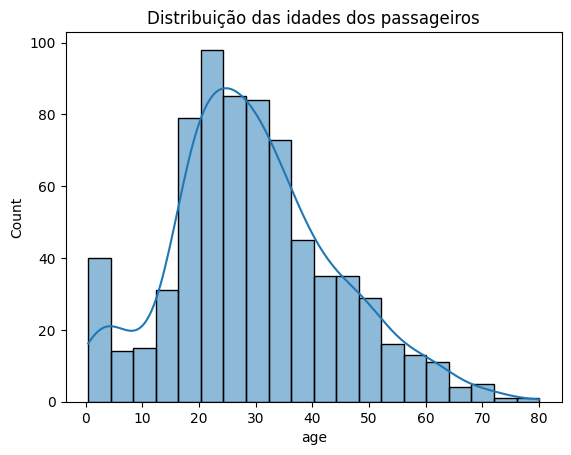

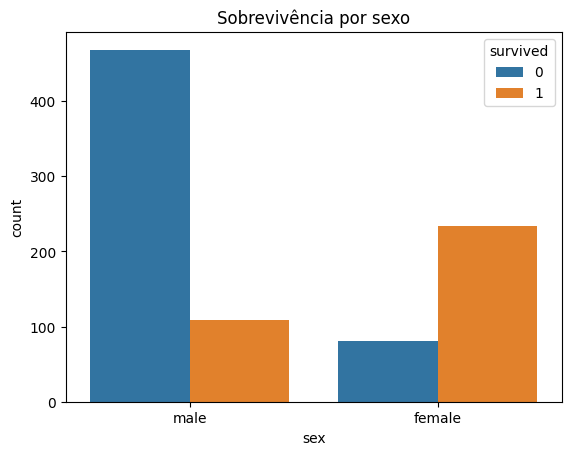

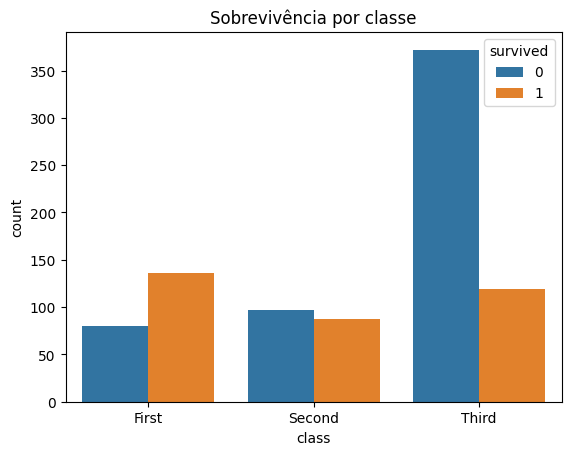

In [4]:
# Distribuição das idades
sns.histplot(titanic['age'], kde=True)
plt.title("Distribuição das idades dos passageiros")
plt.show()

# Sobrevivência por sexo
sns.countplot(x='sex', hue='survived', data=titanic)
plt.title("Sobrevivência por sexo")
plt.show()

# Sobrevivência por classe
sns.countplot(x='class', hue='survived', data=titanic)
plt.title("Sobrevivência por classe")
plt.show()


## 5. Próximos passos
- Tratar valores ausentes (idade, deck, embarque).
- Criar novos gráficos cruzando variáveis (ex.: idade vs sobrevivência por classe).
- Testar um modelo preditivo (Logistic Regression).
- Transformar em dashboard interativo (Streamlit).


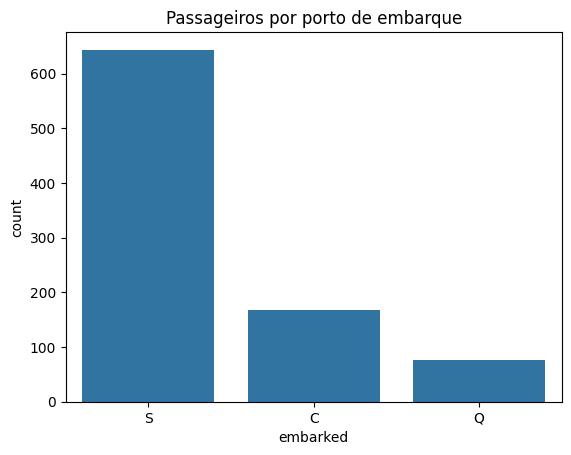

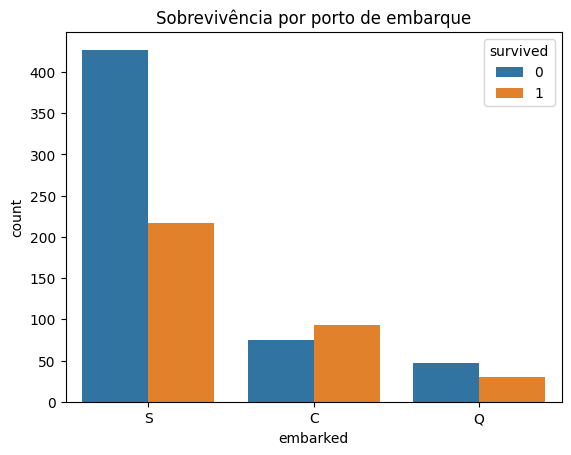

In [5]:
# Contagem de passageiros por porto de embarque
sns.countplot(x='embarked', data=titanic)
plt.title("Passageiros por porto de embarque")
plt.show()

# Sobrevivência por porto de embarque
sns.countplot(x='embarked', hue='survived', data=titanic)
plt.title("Sobrevivência por porto de embarque")
plt.show()


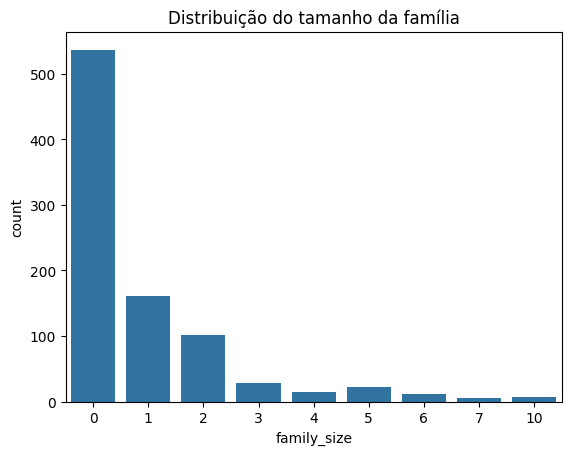

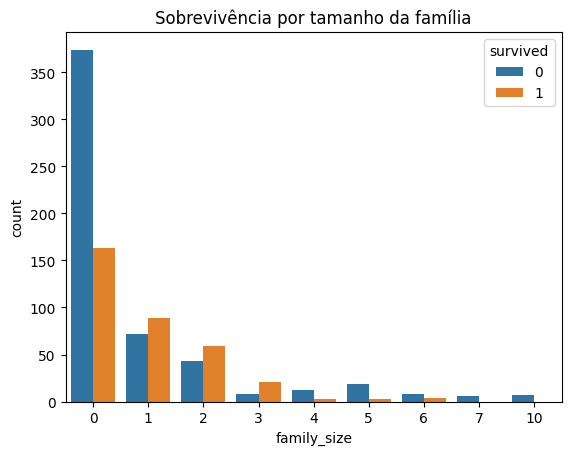

In [6]:
# Criar nova coluna com o tamanho da família
titanic['family_size'] = titanic['sibsp'] + titanic['parch']

# Distribuição do tamanho da família
sns.countplot(x='family_size', data=titanic)
plt.title("Distribuição do tamanho da família")
plt.show()

# Sobrevivência por tamanho da família
sns.countplot(x='family_size', hue='survived', data=titanic)
plt.title("Sobrevivência por tamanho da família")
plt.show()
